In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

In [ ]:
#file_path_training = os.path.abspath('../data/train-data/data_training.csv')
#file_path_test = os.path.abspath('../data/test-data/data_training.csv')


In [15]:
# read training and test dataset
df_training = pd.read_csv('data_training.csv', sep=';', index_col='ID', na_values='#N/D')
df_test = pd.read_csv('data_test.csv', sep=';', index_col='ID', na_values='#N/D')

# display the first few rows of the training dataset
df_training.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
ID,,,,,,,,,,,,,,,,,,,
5008804,1,1,1,1,0,0,0,0,2,15,427500.0,3.286.857.361.889.700,12.435.573.625.741.800,Working,Higher education,Civil marriage,Rented apartment,Other,1
5008806,1,1,1,0,0,0,0,0,2,29,112500.0,5.879.381.506.807.120,31.047.865.459.249.600,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
5008808,0,0,1,0,1,1,0,0,1,4,270000.0,5.232.140.290.355.030,8.353.354.278.321.930,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504.343.004.989.800,0.0,Pensioner,Higher education,Separated,House / apartment,Other,0
5008815,1,1,1,1,1,1,0,0,2,5,270000.0,461.939.670.219.101,21.054.504.883.741.600,Working,Higher education,Married,House / apartment,Accountants,0


In [16]:
# Analizar todas las columnas
for column in df_training.columns:
  print(f"Column name: {column}")
  print(f"Data type: {df_training[column].dtype}")
  print(f"Number of unique values: {df_training[column].nunique()}")
  print(f"Number of missing values: {df_training[column].isnull().sum()}")
  print(f"Sample values: {df_training[column].head(3)}")
  print("-" * 60)

Column name: Gender
Data type: int64
Number of unique values: 2
Number of missing values: 0
Sample values: ID
5008804    1
5008806    1
5008808    0
Name: Gender, dtype: int64
------------------------------------------------------------
Column name: Own_car
Data type: int64
Number of unique values: 2
Number of missing values: 0
Sample values: ID
5008804    1
5008806    1
5008808    0
Name: Own_car, dtype: int64
------------------------------------------------------------
Column name: Own_property
Data type: int64
Number of unique values: 2
Number of missing values: 0
Sample values: ID
5008804    1
5008806    1
5008808    1
Name: Own_property, dtype: int64
------------------------------------------------------------
Column name: Work_phone
Data type: int64
Number of unique values: 2
Number of missing values: 0
Sample values: ID
5008804    1
5008806    0
5008808    0
Name: Work_phone, dtype: int64
------------------------------------------------------------
Column name: Phone
Data type: 

### Conclusiones:
1.- Se Elimina las columnas que no aportan Informacion para el estudio: Age, Years_employed

In [17]:
df_training.drop(columns = ['Age','Years_employed'], inplace = True)
df_test.drop(columns = ['Age','Years_employed'], inplace = True)

In [18]:
#Realizamos un análisis de nulos para validar si existen datos faltantes
df_training.isna().sum().sort_values(ascending = False)
df_test.isna().sum().sort_values(ascending = False)

Gender             0
Account_length     0
Occupation_type    0
Housing_type       0
Family_status      0
Education_type     0
Income_type        0
Total_income       0
Num_family         0
Own_car            0
Num_children       0
Unemployed         0
Email              0
Phone              0
Work_phone         0
Own_property       0
Target             0
dtype: int64

Conclusion: Todo bien. No existen datos nulos.

In [19]:
#Función de variables categóricas
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

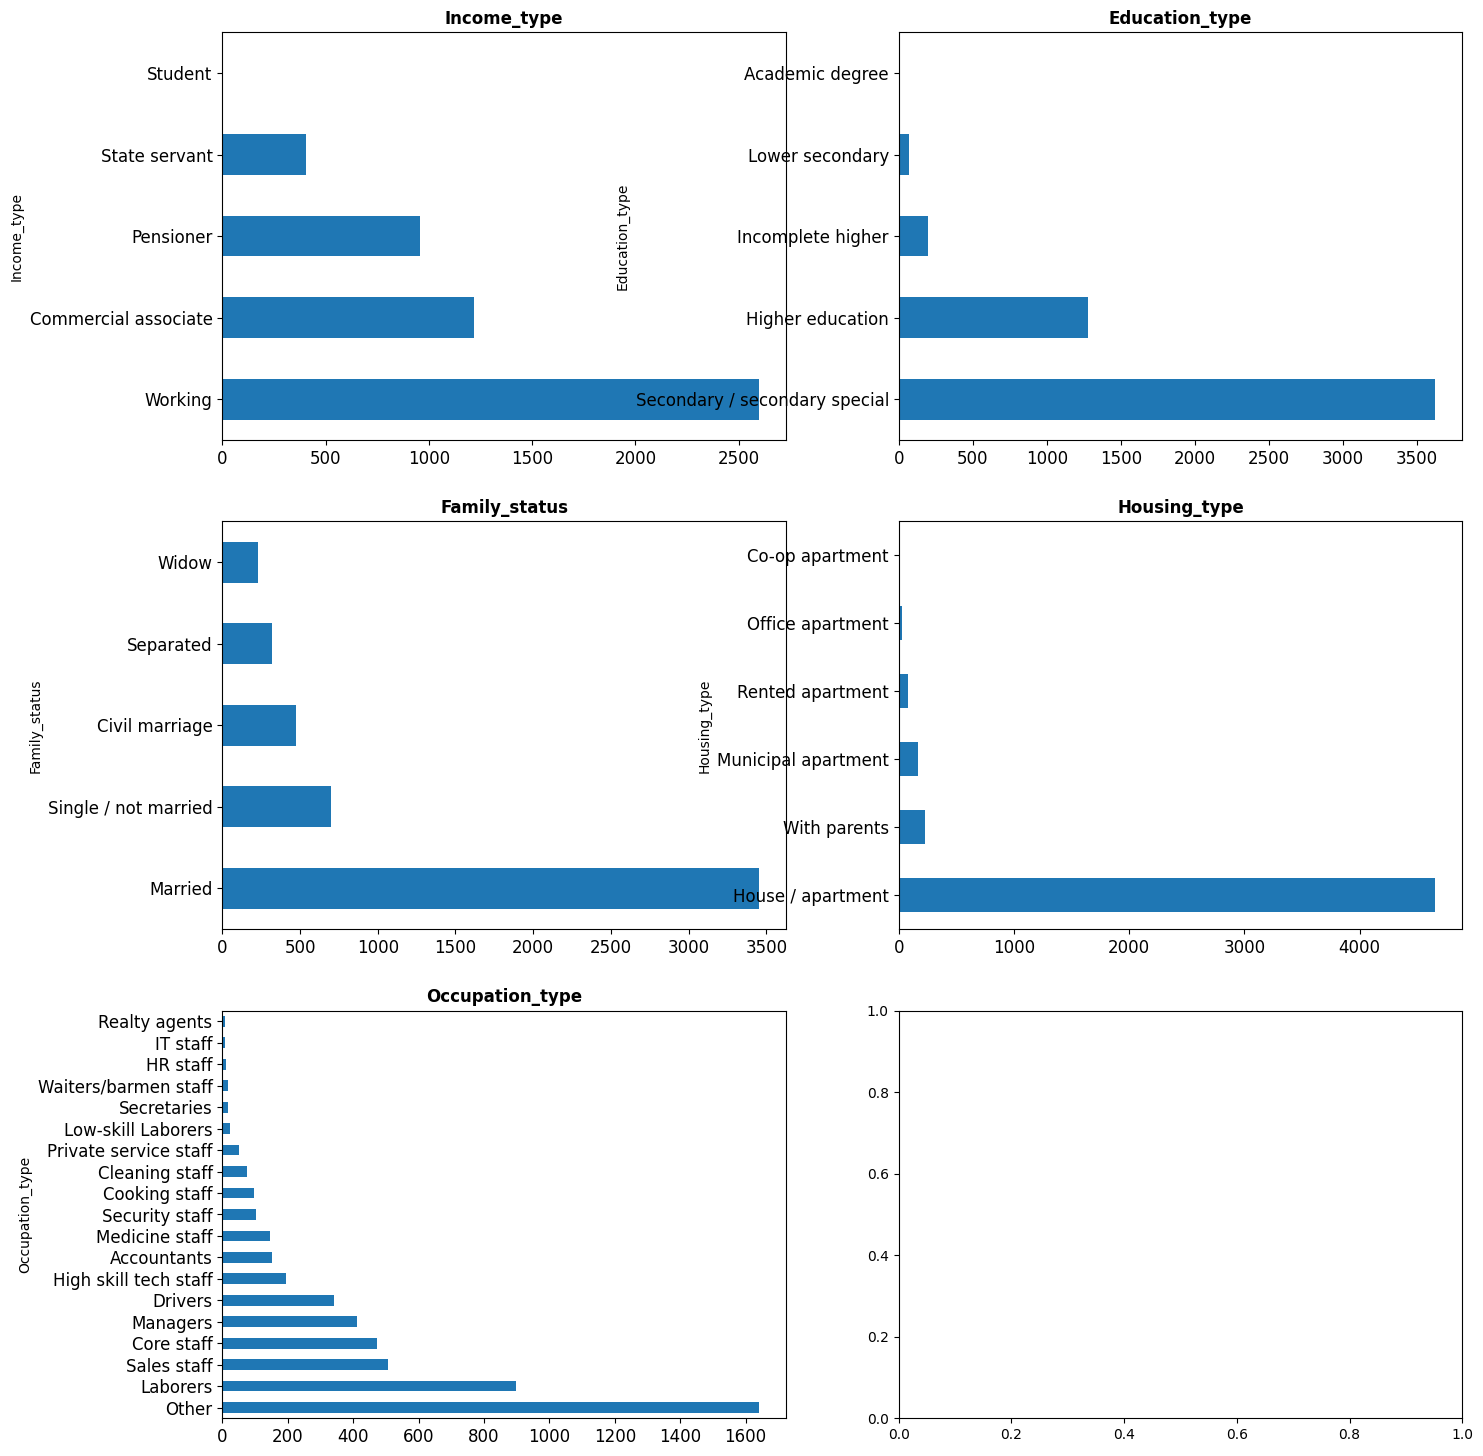

In [7]:
#Ejecutamos la función de variables categóricas.
graficos_eda_categoricos(df_training.select_dtypes('O'))

In [20]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [10]:
estadisticos_cont(df_training.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Gender,5181.0,0.341247,0.0,0.474174,0.0,0.0,0.0,1.0,1.0
Own_car,5181.0,0.367883,0.0,0.482276,0.0,0.0,0.0,1.0,1.0
Own_property,5181.0,0.717429,1.0,0.450293,0.0,0.0,1.0,1.0,1.0
Work_phone,5181.0,0.184327,0.0,0.387788,0.0,0.0,0.0,0.0,1.0
Phone,5181.0,0.276395,0.0,0.447257,0.0,0.0,0.0,1.0,1.0
Email,5181.0,0.090330,0.0,0.286682,0.0,0.0,0.0,0.0,1.0
Unemployed,5181.0,0.184520,0.0,0.387945,0.0,0.0,0.0,0.0,1.0
Num_children,5181.0,0.404362,0.0,0.731247,0.0,0.0,0.0,1.0,14.0
Num_family,5181.0,2.161938,2.0,0.903354,1.0,2.0,2.0,3.0,15.0
Account_length,5181.0,27.403397,26.0,16.657734,0.0,13.0,26.0,41.0,60.0


Basado en la descripción estadística las siguientes columnas no aportan información útil debido a su baja variabilidad o baja relevancia potencial:

1. Work_phone
2. Phone
3. Email

In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
categorical_columns = ['Income_type', 'Education_type', 'Family_status','Housing_type', 'Occupation_type']
le = LabelEncoder()

# Aplica Label Encoding a cada columna categórica
for col in categorical_columns:
    df_training[col] = le.fit_transform(df_training[col])
    df_test[col] = le.transform(df_test[col])  # Usa el mismo encoder entrenado en el training set

In [24]:
estadisticos_cont(df_training.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Gender,5181.0,0.341247,0.0,0.474174,0.0,0.0,0.0,1.0,1.0
Own_car,5181.0,0.367883,0.0,0.482276,0.0,0.0,0.0,1.0,1.0
Own_property,5181.0,0.717429,1.0,0.450293,0.0,0.0,1.0,1.0,1.0
Work_phone,5181.0,0.184327,0.0,0.387788,0.0,0.0,0.0,0.0,1.0
Phone,5181.0,0.276395,0.0,0.447257,0.0,0.0,0.0,1.0,1.0
Email,5181.0,0.090330,0.0,0.286682,0.0,0.0,0.0,0.0,1.0
Unemployed,5181.0,0.184520,0.0,0.387945,0.0,0.0,0.0,0.0,1.0
Num_children,5181.0,0.404362,0.0,0.731247,0.0,0.0,0.0,1.0,14.0
Num_family,5181.0,2.161938,2.0,0.903354,1.0,2.0,2.0,3.0,15.0
Account_length,5181.0,27.403397,26.0,16.657734,0.0,13.0,26.0,41.0,60.0


In [25]:
# convert data to table
table_training = pa.Table.from_pandas(df_training)
table_test = pa.Table.from_pandas(df_test)

In [26]:
# write tables out to parquet
#pq.write_table(table_training, "../data/train-data/data-training.parquet", version="1.0")
pq.write_table(table_training, "data-training.parquet", version="1.0")
#pq.write_table(table_test, "../data/test-data/data-test.parquet", version="1.0")
pq.write_table(table_test, "data-test.parquet", version="1.0")